# Data Cleaning for Machine Learning Lab w/ Template

[Full Project Checklist Here](https://docs.google.com/spreadsheets/d/1y4EdxeAliOQw9CDHx0_brjmk-LUb3gfX52zLGSqLg_g/edit?usp=sharing)

In this notebook, we will be cleaning, exploring, preprocessing, and modeling [Airbnb listing data](http://insideairbnb.com/get-the-data.html) from Boston and Cambridge.

The purpose of this notebook is to 
1. practice data cleaning for ML and 
2. show how to effectively use this template to bring some structure to your ML projects.

### Instructions

1. Edit all cells that say "TO DO"

In [ ]:
## TO DO: Add 1 + 1

2. Read, but do not edit, cells that say "DO NOT CHANGE"

In [87]:
## DO NOT CHANGE:
10%2==0

True

## Prerequisite: Business and Data Understanding

Before doing any data cleaning or exploration, do the best you can to identify your goals, questions, and purpose of this analysis. Additionally, try to get your hands on a Data Dictionary or schema if you can. You, ideally, will be able to answer questions like this...

- Business Questions:
    - What's the goal of this analysis?
    - What're some questions I want to answer?
    - Do I need machine learning?
- Data Questions:
    - How many features should I expect?
    - How much text, categorical, or image data to I have? All of these need to be turned into numbers somehow.
    - Do I already have the datasets that I need?

Honestly, taking 1-2 hours to answer these can go a long way.

> **One of the worst feelings you can get in these situations is feeling overwhelmed and lost while trying to understand a big and messy dataset. You're doing yourself a favor by studying the data before you dive in.**

---

### Let's Get Started...

---

## Table of Contents <a class='anchor' id='toc'></a>

#### I. [Import Data & Libraries](#idl)
#### II. [Exploratory Data Analysis](#eda)
#### III. [Train/Test Split](#tts)
#### IV. [Prepare for ML](#pfm)
#### V. [Pick your Models](#pym)
#### VI. [Model Selection](#ms)
#### VII. [Model Tuning](#mt)
#### VIII. [Pick the Best Model](#pbm)



## I. Import Data & Libraries <a class="anchor" id="idl"></a>

### Import Libraries

In [ ]:
## DO NOT CHANGE

# Data manipulation
import pandas as pd
import numpy as np

# More Data Preprocessing & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading/Importing Data

In [ ]:
## DO NOT CHANGE
boston_url = "https://github.com/pdeguzman96/data_cleaning_workshop/blob/master/boston.csv?raw=true"
cambridge_url = "https://github.com/pdeguzman96/data_cleaning_workshop/blob/master/cambridge.csv?raw=true"

In [ ]:
## TO DO: import the data using the links above (Hint: pd.read_csv may be helpful)

## if you have the csv files saved into your directory (which you should if you downloaded the whole Github repo)
    ## Just replace the urls with the filepath
boston_df = 
cambridge_df = 

In [ ]:
## DO NOT CHANGE
## TO DO: Skim through all the columns. There are a lot of columns that we don't need right now.
pd.options.display.max_rows = boston_df.shape[1]
boston_df.head(2).T

Dropping columns that we're not going to use for this notebook.

In [ ]:
## DO NOT CHANGE
## These are urls, irrelevant dates, text data, names, zipcode, repetitive information, columns with 1 value

drop = ['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_about', 'host_thumbnail_url', 'host_picture_url',
        'calendar_updated', 'calendar_last_scraped', 'license', 'name', 'host_name', 'zipcode', 'id','city', 'state',
        'market','jurisdiction_names', 'host_location', 'street', 'experiences_offered','country_code','country',
        'has_availability','is_business_travel_ready', 'host_neighbourhood','neighbourhood_cleansed','smart_location',
        'neighbourhood']

In [ ]:
## TO DO: drop the columns above from boston_df and cambridge_df

In [ ]:
## TO DO: concatenate the dataframes together (hint: pd.concat using axis=0 and ignore_index=True). Store in df
df = 

## II. Exploratory Data Analysis<a class="anchor" id="eda"></a>
**[Back to top](#toc)**

This section is where you're going to really try to get a feel of what you're dealing with. You'll be doing lots of cleaning and visualizing before you're ready for ML.

This usually the most time consuming section before you get to a simple working ML algorithm.

### A. Duplicate Value Check

We don't need/want any rows that are purely identical to one another.

In [ ]:
## TO DO: drop any duplicate rows

Were there any duplicates?

### B. Separate Data Types

Generally, there are 5-6 types of data you will run into.

1. Numerical
2. Categorical
3. Date/Time
4. Text
5. Image
6. Sound

We don't have any Image or Sound data, and we removed Text data to make this simple and easier, so we're going to have to deal with Numerical, Categorical, and Date/Time.

**Let's start with separating our data apart into Numerical and Categorical.**

In [ ]:
## TO DO: create a dataframe of only categorical variables (Hint: df.select_dtypes(['object', 'bool']))
cat_df =

## TO DO: create a dataframe of only numerical variables (Hint: data types "int" or "float")
num_df =

---
So now we need to account for all of the following possible data types...

1. Numerical *(1.3, -2.345, 6,423.1)*
2. Categorical
    - Binary *(True/False, 0/1, Heads/Tails)*
    - Ordinal *(Low, Medium, High)*
    - Nominal *(Red, Blue, Purple)*
3. Date/Time 

---

> As you take an inventory of your data, use this next section to look through your data to **identify anything you have to fix** in order for your data to be **ready for EDA**.

#### Skim through the Numerical data

In [ ]:
# Glance at the numerical data
num_df.head().T

The numerical features should look OK. Nothing obvious that we have to fix other than missing values, which we will deal with later.

#### Skim through the Catgorical Data

Most (if not, all) problems will come from this subset.

In [ ]:
# Skim the output to look for things to fix
cat_df.head().T

**We have a lot of work to do for these categorical columns.**

**Here's what we're going to take care of below...**
1. Numerical data stored as Categorial (strings)
    - Convert some of these to numerical columns (i.e. `price` features and `host_response_rate`)
2. Binary data needs to be binarized into 1's and 0's
    - We can Binarize the Binary/Boolean columns (such as `requires_license`)
3. Ordinal (should generally be encoded to retain their information (e.g. {1,2,3} to encode {low, med, high})
    - The only ordinal-looking column I see is `host_response_time`, but let's treat it as nominal for simplicity
4. Nominal data to be unpacked, then later one hot encoded
    - `host_verifications` and `amenities` have multiple items that need to be extrapolated into their own columns
    - All other categorical columns, like `neighborhood`, `cancellation_policy`, `property_type` should be one hot encoded.
5. Date/Time features need to be engineered
    - Using these dates we can engineer features from the dates columns. We'll do this later

### C. Initial Data Cleaning (for exploration)

Before we're ready to perform some EDA (Exploratory Data Analysis), we should address the points stated above.

#### Convert Numerical Features to Numerical Data Types (if they were typed as objects instead of numbers)

In [ ]:
## DO NOT CHANGE

# Getting all the features that should be numerical, but are typed as objects (strings)
cat_to_num = ['host_response_rate', 'price', 'weekly_price',
              'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

# Keeping changes in a temporary copied DataFrame
# Setting deep=True creates a "deepcopy", which guarantees that you're creating a new object
    # Sometimes when you copy an object into a new variable, this new variable just points back to the copied object
    # This can have unintended consequences - if you edit one variable, you also might edit the other
cat_to_num_df = cat_df[cat_to_num].copy(deep=True)

In [ ]:
## TO DO: Take a peek at the data in cat_to_num_df using head(), What do you see?

In [ ]:
## TO DO: remove the percent sign, then convert to a number (Hint: str.replace() & astype() will be useful)
## Overwrite the old values with the updated values in 'host_response_rate'


For the rest of the columns regarding price, remove the "$" and "," then convert to float.

In [ ]:
## DO NOT CHANGE
price_cols = ['price', 'weekly_price','monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [ ]:
## TO DO: For each of the price columns, remove commas and dollar signs, then convert it to float
for col in price_cols:

In [ ]:
## TO DO: Append the new cat_to_num_df data to the num_df DataFrame using pd.concat and axis=1
num_df =

In [ ]:
## TO DO: Drop the old columns from the cat_df DataFrame using the appropriate axis
cat_df = 

#### Convert Binary Columns to Boolean (Not necessary for exploration, but we have to do this later anyway)

In [ ]:
bi_cols = []

## TO DO: Loop through each column and store all columns with only 2 values in the bi_cols list
## Hint: the nunique() method will be helpful

for col in cat_df.columns:
        
## TO DO: Take a peek at first few rows of the columns in bi_cols. What do you see?

In [ ]:
## TO DO: Convert all binary columns to 1's and 0's. (Hint: the .map() method with a dictionary is helpful and fast)
## Make sure you overwrite the old columns with these new ones in cat_df

In [ ]:
## TO DO: Take a peak at the bi_cols in cat_df using head to see if everything looks okay

#### Nominal (Extrapolating Multiple Values in one Feature)

- host_verifications
- amenities

In [25]:
## DO NOT CHANGE
## Next, we need to unpack these values in order for them to be meaningful
cat_df[['host_verifications', 'amenities']].head(2)

,host_verifications,amenities
0,"['email', 'phone', 'reviews', 'kba']","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
1,"['email', 'phone', 'reviews', 'kba']","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


> **Let's start by turning these features into lists.**

Looking at the first few rows above, it looks like we need to remove the brackets, curly brackets, and quotes.

For example, we need to turn the string `"['email', 'phone', 'reviews', 'kba']"` into a Python list `[email, phone, reviews, kba]` for each row.

In [ ]:
## DO NOT CHANGE
## This function is meant to be used with the apply method
def striplist(l):
    '''
    To be used with the apply method on a packed feature
    '''
    return([x.strip() for x in l])

In [ ]:
## DO NOT CHANGE
# These steps turn the string into lists
# Note: You can break code lines using "\"
cat_df['host_verifications'] = cat_df['host_verifications'].str.replace('[', '') \
                                                           .str.replace(']', '') \
                                                           .str.replace("'",'') \
                                                           .str.lower() \
                                                           .str.split(',') \
                                                           .apply(striplist)

In [ ]:
## TO DO: turn the amenities column of strings into a column of lists (similar to what we did above)

Binarizing the lists (sklearn has a handy transformer, `MultiLabelBinarizer` that can do this for you efficiently).

This Transformer will turn the lists within each column into dummy features.

In [ ]:
## TO DO: instantiate the MultiLabelBinarizer() (make sure you include the parentheses to create the object)
mlb = 

In [ ]:
## TO DO: Use the MultiLabelBinarizer to fit and transform host_verifications
## TO DO: Store this result in an object called host_verif_matrix (note that sklearn transformers output numpy arrays)
host_verif_matrix = 

In [31]:
## DO NOT CHANGE
# This is what the output looks like when you use this transformer.
# The below code converts the matrix to a DataFrame
host_verif_df = pd.DataFrame(host_verif_matrix, columns = mlb.classes_)
host_verif_df.head(2)

,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,none,offline_government_id,phone,reviews,selfie,sesame,sesame_offline,weibo,work_email,zhima_selfie
0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
## TO DO: Use the MultiLabelBinarizer to fit and transform amenities
amenities_matrix = 

## TO DO: Store this result in a DataFrame called amenities_df (similar to what we did above with host_verif_df)
amenities_df = 
## TO DO: Print the first few rows of amenities_df using head()

Does something look weird about the very first column after the index? 

It looks like we picked up a blank column with an empty string as the name. This probably happened because there were blanks in the `amenities` lists. Let's just drop it this column.

In [ ]:
## TO DO: in the amenities_df, drop the column that's named '' (Hint: amenities_df.drop())

Now we need to drop the original columns and concatenate the new DataFrames together to the original `cat_df` DataFrame.

In [ ]:
## TO DO: drop the old host_verifications and amenities features from cat_df
cat_df = 

## TO DO: concatenate amenities_df and host_verif_df to the original cat_df DataFrame
cat_df = 

#### Date/Time Feature Engineering

Typically, date/time data is used in time-series analysis. We're not dealing with time-series analysis, so we can get rid of these columns. However, before we get rid of them, let's create some features that might be useful for us later.

In [35]:
## DO NOT CHANGE
## Here are our date features
dt_cols = ['host_since', 'first_review', 'last_review']
cat_df[dt_cols].head(1)

,host_since,first_review,last_review
0,2009-02-19,2009-03-21,2019-10-31


In [ ]:
## TO DO: Loop through the columns, converting them to the datetime dtype (hint: pd.to_datetime() is useful)

Converting the date features to "days since" features so we have numerical values to work with.

In [ ]:
## TO DO: capture today's date using pd.to_datetime (Hint: you can pass the string "today" into to_datetime)
today = 

In [ ]:
## TO DO: Create one new date feature that counts number of days since today's date for each of the three date features
## Hint 1: You can subtract dates from one another
## Hint 2: the Pandas datetime data type has useful attributes that you can access (e.g. datetime.days)

In [ ]:
## TO DO: Drop the original date columns from cat_df

In [ ]:
## TO DO: combine your num_df and cat_df into one new DataFrame named cleaned_df
cleaned_df = 

### D. Visualize & Understand (EDA)

> **Now we're in a good position for Exploratory Data Analysis**.

Use this section as an opportunity to explore some interesting questions that you can think of. 

> Note that a lot of interesting questions you may be interested in asking might require Machine Learning, which we can't perform until the end of this notebook.

---
**Example EDA**

Here's a simple example of something we can try to answer...

*Do hosts with no recent reviews have different pricing from hosts with recent reviews?*

In [42]:
## DO NOT CHANGE - Here's an example of a way to answer the EDA question above

# Creating a discrete feature based on how recent the last review was
bins = [0, 90, 180, 365, 730, np.inf]
labels = ['last 90 days', 'last 180 days','last year', 'last 2 years', 'more than 2 years']
cleaned_df['last_review_discrete'] = pd.cut(num_df['last_review_days'], bins=bins, labels=labels)

# Filling the Null values in this new column with "no reviews", assuming Null means there are no reviews
cleaned_df['last_review_discrete'] = np.where(cleaned_df['last_review_discrete'].isnull(),
                                              'no reviews', 
                                              cleaned_df['last_review_discrete'])

> Sometimes you might want to edit your data while you explore it, so it may be a good idea to copy your cleaned data into a new DataFrame just for exploration.

In [43]:
## DO NOT CHANGE 
# The colon ensures a true copy is made
eda = cleaned_df[:]

In [44]:
## DO NOT CHANGE 
# Let's separate this out between the room types. Let's ignore the last two
eda['room_type'].value_counts()

Entire home/apt    2908
Private room       1812
Shared room          35
Hotel room           29
Name: room_type, dtype: int64

In [45]:
## DO NOT CHANGE 
eda_viz = eda[eda['room_type'].isin(['Entire home/apt', 'Private room'])]

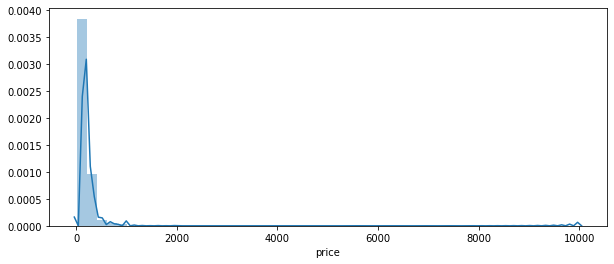

In [46]:
## DO NOT CHANGE 
# Let's also remove the price outliers
plt.figure(figsize=(10,4))
sns.distplot(eda['price'])
plt.show()

In [47]:
## DO NOT CHANGE 
# Filtering out prices that are greater than 3 sample standard deviations from the mean
price_mean = np.mean(eda['price'])
price_std = np.std(eda['price'])
price_cutoff = price_mean + price_std*3

In [48]:
## DO NOT CHANGE 
eda_viz = eda_viz[eda_viz['price'] < price_cutoff]

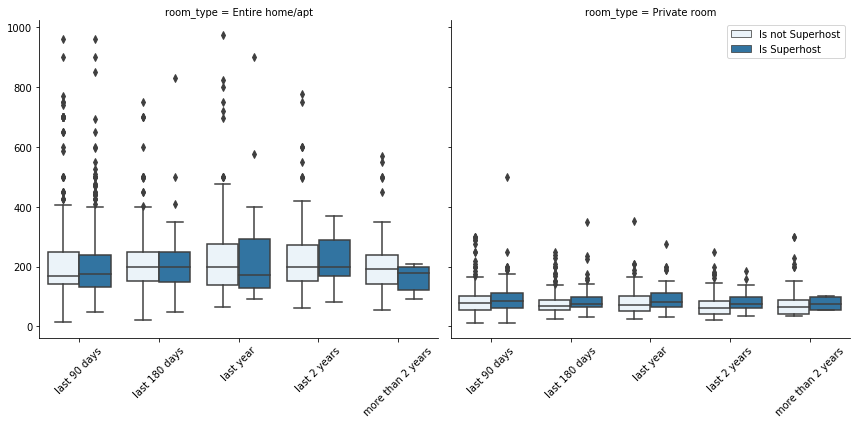

In [49]:
## DO NOT CHANGE 
fgrid = sns.FacetGrid(eda_viz, col='room_type', height=6,)
fgrid.map(sns.boxplot, 'last_review_discrete', 'price', 'host_is_superhost', 
          order=labels, hue_order = [0,1])

for ax in fgrid.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set(xlabel=None, ylabel=None)

l = plt.legend(loc='upper right')
l.get_texts()[0].set_text('Is not Superhost')
l.get_texts()[1].set_text('Is Superhost')

fgrid.fig.tight_layout(w_pad=1)

Looking at the faceted plots above, it seems that units that haven't been reviewed for a long time are priced slightly higher than units with more recent reviews. Also, it appears that superhosts' pricing (dark blue) is higher than non-superhosts (light blue), suggesting that hosts who are verified as superhosts (hosts who are top-rated and most experienced) are priced higher than those who are not.

However, we haven't verified any of these with meaningful statistical tests. This is all descriptive analysis.

---

In [ ]:
## SKIP FOR NOW. Come back to this when you've finished the notebook. 
    ## Depending on what you want to try, this might take a while
    
## TO DO: Think of your own EDA question. Try to answer it below. 
    ## You can create features for this, but don't add them to cleaned_df, add them to a copied DF called eda
## Some ideas...
    ## What kinds of amenities do the expensive listings usually have?
    ## Do hosts with many listings have higher or lower reviews than hosts with only a few listings?

### E. Assess Missing Values

> **Do not fill or impute them yet at this point! We want to fill missing values after we train/test split.**

In this section, we need to come up with a strategy on how we're going to tackle our missing values. Most ML algorithms (except fancy ones like [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)) cannot handle NA values, so we need to deal with them.

You have two options, and I'll describe some strategies for each option below:
1. **Remove them**
    - Are there many missing values in a particular **column**? Perhaps it's not very useful if there's too many missing.
    - Are there many missing values in a particular **row**? Perhaps this missingness caused by something reasonable or a data-collecting failure. Investigate these in case you can reasonably identify a reason why they're missing before you drop them.
    - Do some rows not contain your *response variable* of interest? Perhaps you want to predict `price` of an Airbnb listing. If so, supervised learning methods require the label (`price`) to be there, so we can disregard these rows.
2. **Fill them** (**Warning**: it's generally **not great practice** to fill missing values **before** you **train/test split** your data. You *can* fill missing values now if it's a one-off analysis, but if this is something you want to implement in practice, you want to be able to test your entire preprocessing workflow to evaluate how good it is. Think of your strategy for filling missing values as another hyperparameter that you want to tune.)
    - Infer the value of missing values from other columns. (e.g. If `state` is missing, but `city` is San Francisco, `state` is probably `CA`)
    - Fill numerical values with mean, median, or mode.
    - Fill categorical values with the most frequent value.
    - Use machine learning techniques to predict missing values. (Check out [IterativeImputer](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) from sklearn for a method of doing this.)

---

**Here's our approach for the section below...**

1. We assess missing values per column to see if we can drop any features.
2. We assess missing values per row to see if we can find any patterns in how these values may be missing.
3. We strategize how we want to fill our categorical features.
4. We strategize how we want to fill our remaining numerical features.

#### 1. Assessing Missing Values per Column

In [ ]:
## TO DO: Let's assume we want to predict the price feature. 
    ## If price is the variable we want to predict, then we have to disregard rows that don't have it
    ## Drop all rows with missing values in the 'price' column
cleaned_df = 

In [ ]:
## TO DO: Calculate the proportion/percentage of NA values per column
## TO DO: There should be 5 columns with much more than 80% of their values missing. Which 5 columns are they?
## TO DO (OPTIONAL): Create a bar chart to visualize the proportion of NA values per column
    # Hint: matplotlib's bar or barh are useful for this.

In [ ]:
## TO DO: Drop the 5 missing columns identified above from cleaned_df

#### 2. Assessing Missing Values per Row

In [ ]:
## TO DO: Create a temporary column called "sum_na_row" in cleaned_df that contains the number of NA values per row
cleaned_df['sum_na_row'] = 

In [ ]:
## TO DO: Use matplotlib or seaborn to plot the distribution of this new column. 
    ## Is there anything in this distribution that looks odd to you??
## Hint: seaborn's distplot() function is nice and easy for this. Alternatively, countplot() may work, too

Look at the distribution of missing values per row. This distribution looks a little odd. Look at how few missing values per row we have between 5-9, then hundreds more from 10-14.

This may be systematically created. Let's investigate if there are specific columns that are consistently empty for these rows.

In [ ]:
## Note: If you were able to spot the same sudden jump in missing values that I did,
    ## you may have noticed that there are a lot of rows with 10 or more missing values,
    ## but there's very few with 5-9 missing values. 

## TO DO: filter cleaned_df for only rows with 10 or more missing values. store this in a temporary DataFrame
temp = 

## TO DO: get the names of the columns that contain missing values from this temporary DF
## Hint: DF.isna().any() can be useful here. 
na_cols = 

# Take a peek at what these features look like. Transposed for readability
temp[na_cols].transpose()

Do you see any patterns in the missing-ness of our data? Which features contain many missing values?

> It looks like a huge portion of missing values are coming from `review`-related features. Why could this be?
---

**My Guess:**

NA values related to reviews are most likely missing because these particular listings do not have any reviews. This could be useful information, so I'll encode these values as `0` so they're different from the values that we do have.

Although `0` may be misleading, I believe filling with `0` is better than simply removing the rows or imputing based on other values to maintain its variance from the units that actually have reviews.

In [ ]:
## DO NOT CHANGE 
# Collecting the numerical review-related columns
zero_fill_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'reviews_per_month', 'first_review_days', 'last_review_days']

#### 3. Categorical Features with Missing Values

Dealing with missing categorical data can be tricky. Here are some ways you can deal with them:
- Fill with mode/most frequent value (e.g. if 70% of a column is "red", maybe you fill the remaining NA values with "red")
- Infer their value from other columns (e.g. if one feature helps you make an educated guess about the missing value)
- Create a dummy variable (e.g. if the value is missing, another dummy feature will have 1 for the missing value. Else, it will be 0)

> Let's take the simple most frequent approach. We'll tackle this using the `SimpleImputer` from sklearn after we train/test split our data.

In [ ]:
## TO DO (OPTIONAL): isolate all categorical columns (i.e. columns of dtype 'object'), 
    ## then make countplots or barplots for each one to visualize how these features are distributed

#### 4. Now what should we do about imputing the rest of our missing numerical features below?**

- A lot of people like the simple approach of filling them with the **mean** or **median** of the features.
- There's also some advanced methods of imputing missing values using Machine Learning. An examle is a neat experimental estimator in sklearn called `IterativeImputer` that uses machine learning to predict and impute many features at once. 

In [61]:
## DO NOT CHANGE 

# Getting indices of columns that still contain missing values
columns_idxs_missing = np.where(cleaned_df.isna().any())[0]
# Getting the names of these columns
cols_missing = cleaned_df.columns[columns_idxs_missing]
# Taking a peek at what's left
cleaned_df[cols_missing].head()

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,host_response_rate,security_deposit,cleaning_fee,host_since_days,first_review_days,last_review_days,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified
0,6.0,6.0,1.0,1.0,1.0,95.0,10.0,10.0,10.0,10.0,...,1.0,0.0,60.0,3984.0,3954.0,78.0,within an hour,0.0,1.0,1.0
1,6.0,6.0,1.0,1.0,2.0,96.0,10.0,10.0,10.0,10.0,...,1.0,0.0,80.0,3984.0,3816.0,76.0,within an hour,0.0,1.0,1.0
2,12.0,12.0,1.0,1.0,1.0,93.0,9.0,9.0,10.0,10.0,...,1.0,1000.0,250.0,3831.0,1984.0,109.0,within a few hours,1.0,1.0,0.0
3,12.0,12.0,1.0,1.0,1.0,95.0,10.0,9.0,10.0,10.0,...,1.0,1000.0,250.0,3831.0,3770.0,125.0,within a few hours,1.0,1.0,0.0
4,11.0,11.0,1.0,0.0,1.0,87.0,9.0,9.0,9.0,8.0,...,1.0,500.0,150.0,3775.0,1469.0,179.0,within an hour,0.0,1.0,0.0


> Took keep things simple, let's just fill the rest of these values with the median.

In [ ]:
## TO DO: Drop the sum_na_row feature we made from cleaned_df
## We don't need this column anymore
cleaned_df = 

In [ ]:
## TO DO: notice how we kept the review-related columns and the categorical columns in the 
    ## arrays "zero_fill_cols" and "cat_cols". 
    ## Identify all remaining columns that aren't in these two lists and store them in an array called median_fill_cols
    ## Also remove "price" from this array.
    ## I'll explain why we do these steps later in the notebook when we fill our missing values.
    
    
    
median_fill_cols = 

## III. Train/Test Split<a class="anchor" id="tts"></a>
**[Back to top](#toc)**

Now here we split our data into training, testing, and (optionally) validation.

However, if you plan to use a validation set or K-Fold Cross Validation, just create your validation sets later when you're evaluating your ML models.

In [ ]:
## TO DO: store cleaned_df without the price column in a variable called X. 
X = 
## TO DO: store cleaned_df['price'] in a variable called y
y = 

## TO DO: Split your data using train_test_split using a train_size of 80%
## TO DO: store all these in the variables below
X_train, X_test, y_train, y_test = 

In [ ]:
## RUN THIS, BUT DO NOT CHANGE
# Setting this option to None to suppress a warning that we don't need to worry about right now
pd.options.mode.chained_assignment = None

## IV. Prepare for ML <a class="anchor" id="pfm"></a>
**[Back to top](#toc)**

Now that we've already split our data and engineered the features that we want, all we have to do is prepare our data for our models.

### A. Dealing with Missing Data

The reason we want to deal with missing data *after* we've split our data is because we want to simulate real world conditions when we test as much as we can. When data is coming/streaming in, we have to be ready with our methods for dealing with missing data.

Below, rather than using panda's `fillna` method, we will take advantage of sklearn's `SimpleImputer` estimator (imputing is just another way of saying you're going to fill/infer missing values in this case).

---

****A Brief Note on sklearn Estimators/Transformers****

Many of sklearn's objects are called "estimators", and all estimators are also "transformers" because they are treated as objects that estimate some parameters about your data, then are used to transform your data in some way to produce a prediction or a transformed (e.g. normalized, standardized, filled NA's with mean, etc) version of your data.

---

We will *fit* three `SimpleImputer` objects on **`X_train` only** according to each of our three strategies above. Then, we will use these imputers to transform **both our `X_train` and `X_test`.** As a reminder, this is what we will do...

1. Fill categorical features stored in `cat_cols` with their mode/most frequent value
2. Fill review-related features stored in `zero_fill_cols` with a constant vaue: 0.
3. Fill all remaining numerical features stored in `median_fill_cols` with their median.

> This is why we stored these column names in the **Assess Missing Values** section. We want to easily change each of these columns for both our X_train and X_test datasets. Also, remember how we dropped `price` from `median_fill_cols`? We needed to remove it because there is no `price` in `X_train` and `X_test`.

**First, let's start with imputing our categorical variables.**

In [68]:
## DO NOT CHANGE - use this as an example of you have to do in the cells below for numerical variables
    ## Notice how we're looping through our columns, imputing one at a time.
    ## Normally, we would fit and transform features all at once with sklearn's ColumnTransformer, but 
    ## this is fine since we're just practicing

# looping through our columns
for col in cat_cols:
    # instantiating/creating an imputer with an impute strategy of "most frequent"
    imputer = SimpleImputer(strategy='most_frequent')
    
    # fit this imputer to the training column. 
        # This stores the most frequent value in the imputer for transforming
    imputer.fit(X_train[[col]])
    
    # using the transform method to fill NA values with the most frequent value, then updating our DFs
    X_train[col] = imputer.transform(X_train[[col]])
    X_test[col] = imputer.transform(X_test[[col]])

---

**Now let's impute our numerical variables.**

In [ ]:
## TO DO: impute the zero_fil_cols features using an imputer with strategy = "constant" and fill_value = 0
## Use what we did above for cat_cols as a reference

In [ ]:
## TO DO: impute the median_fill_cols using an imputer with strategy = "median"
## Use what we did above for cat_cols as a reference

### B. Feature Engineering 

> Use this section as an opportunity to create useful features for your ML model. Note that any features you create might create NA or Infinite values, which have to be taken care of before using the data in most ML models.

**An easy idea**: Ratio of capacity to beds.

In [ ]:
## TO DO: In X_train, create a new feature called "capacity_to_beds" by dividing the "accomodates" feature by "beds"

## TO DO: Do the same thing for X_test. Can you think of anything that can go wrong if you do this?

Be careful with ratios because
1. dividing by zero might create infinite values and 
2. any operations with NA values create more NA values. This *shouldn't* be a problem because we already took care of NA values, but try to remember this.

I think filling these values with zero is reasonable for now.

In [ ]:
## TO DO: Fill infinite values in this new column with zero in X_train and X_test. 
## (Hint: np.where and np.isinf can be helpful)


### C. Transform Data

**Transforming Numerical Data - Log Transform**

Now is a good time to do any numerical data transformations if you haven't done them already.

An example could be to log-transform salary or price fields to make the distributions look more normal. Here's one way you can do that.

/Users/patrickdeguzman/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


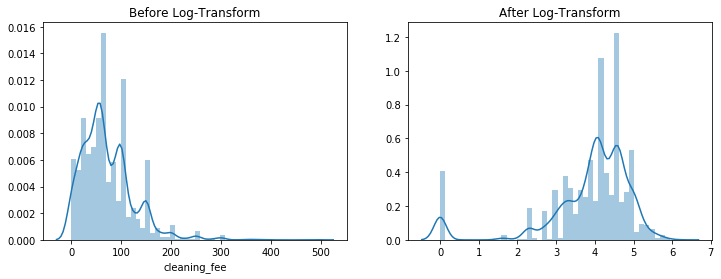

In [71]:
## DO NOT CHANGE
plt.figure(figsize=(12,4))

# Creating plot on the left
plt.subplot(121)
sns.distplot(X_train['cleaning_fee'])
plt.title('Before Log-Transform')

# Creating plot on the right
plt.subplot(122)
log_transform_train = np.where(np.isinf(np.log(X_train['cleaning_fee'])), 0, np.log(X_train['cleaning_fee']))
log_transform_test = np.where(np.isinf(np.log(X_test['cleaning_fee'])), 0, np.log(X_test['cleaning_fee']))
sns.distplot(log_transform_train)
plt.title('After Log-Transform')

plt.show()

In [ ]:
## TO DO: update the "cleaning_fee" features in X_train and X_test with their log-transformed value
## Careful if you try to compute the log yourself - taking the log of 0 will create an infinite value
    ## if you choose to compute log yourself with np.log, make sure you fill np.inf values with 0

**Transforming Numerical Data - Standardization**

A lot of Machine Learning models perform better after you've standardized the features, such as Linear Regression, Logistic Regression, and Neural Networks. It may not always be required (this doesn't really matter for Random Forests).

In this section, we will standardize our data anyway. We don't have to standardize our binary features since they're either {0,1}, but we should standardize everything else.

In [ ]:
## DO NOT CHANGE
temp_df = X_train.select_dtypes(['float', 'int'])

# Gathering binary features
bi_cols = []
for col in temp_df.columns:
    if temp_df[col].nunique() == 2:
        bi_cols.append(col)

In [ ]:
## TO DO: store all the columns we need to standardize in cols_to_standardize.
## Hint: bi_cols contains all the columns that you don't need to standardize. np.setdiff1d may be helpful
cols_to_standardize = 

In [ ]:
## TO DO: instantiate the StandardScaler() (make sure you include the parenthesis to create the object)
    ## store this object in scaler below
scaler = 
## TO DO: fit the scaler to X_train's cols_to_standardize only

## TO DO: transform (DO NOT FIT_TRANSFORM) X_train and X_test's cols_to_standardize and update the DataFrames
X_train[cols_to_standardize] = 
X_test[cols_to_standardize] = 

#### Encoding Categorical Data

We still have to convert our categorical data into numbers. Here we're going to simply OneHotEncode (very similar to pd.get_dummies) our `cat_cols`.

In [76]:
## DO NOT CHANGE
print('Unique Values per categorical column...')
for col in cat_cols:
    print(f'{col}: {X_train[col].nunique()}')

Unique Values per categorical column...
host_response_time: 4
property_type: 19
room_type: 4
bed_type: 4
cancellation_policy: 6
last_review_discrete: 6


In [ ]:
## TO DO: Finish the code
for col in cat_cols:
    ## TO DO: instantiate the OneHotEncoder with handle_unknown = 'ignore' and sparse=False. Store object in ohe
    ohe = 
    ## TO DO: fit ohe to the current column "col" in X_train
    ohe.fit
    
    # This extracts the names of the dummy columns from ohe
    dummy_cols = list(ohe.categories_[0])
    
    # This creates new dummy columns in X_train and X_test that we will fill
    for dummy in dummy_cols:
        X_train[dummy] = 0
        X_test[dummy] = 0
    
    ## TO DO: transform the X_train and X_test column "col" and update the dummy_cols we created above
    X_train[dummy_cols] = 
    X_test[dummy_cols] = 

In [ ]:
## TO DO: drop the original cat_cols from X_train and X_test

**Text Data**

We omitted text data in the beginning of the notebook, but a good place to start when working with text data is using [NLTK](https://www.nltk.org/), the Natrual Language Toolkit Library.

### D. Feature Selection

Depending on how big your dataset is, you may want to reduce the number of features you have for performance purposes. Here we will simply reduce number of features by removing highly correlated features.

In [ ]:
## TO DO (this may be tough- check solution for help)
    ## identify pairs of features that have a correlation higher than 0.8 or lower than -0.8 from X_train
    ## remove ONLY ONE of these features from both X_train and X_test
    ## Hint 1: df.corr() and np.triu() can be helpful here
    ## Hint 2: you should end up removing 33 features (unless you added extra features than what was given)

## **Congrats! Now you have train and test datasets that are ready for Machine Learning modeling!**
 
 > **This is the end of the exercises. Below is some very simple ML modeling with the data that we prepared together**

---

## V. Pick your Models <a class="anchor" id="pym"></a>
**[Back to top](#toc)**

In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [82]:
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

models = [rf, gbr, svr]

## VI. Model Selection <a class="anchor" id="ms"></a>
**[Back to top](#toc)**

Evaluate your models, and pick the 2-3 best performing ones for tuning.

In [83]:
results = []
for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    
    metrics = {}
    metrics['model'] = model.__class__.__name__
    metrics['mse'] = mse
    metrics['mae'] = mae
    results.append(metrics)

In [84]:
pd.set_option('display.float_format', lambda x: '%7.2f' % x)

pd.DataFrame(results, index=np.arange(len(results))).round(50)

,model,mse,mae
0,RandomForestRegressor,61360.79,56.51
1,GradientBoostingRegressor,91765.90,68.03
2,SVR,112711.50,67.50


## VII. Model Tuning <a class="anchor" id="mt"></a>
**[Back to top](#toc)**

Tune the hyperparameters of your models, or even try adding new engineered features, or different transformations.

## VIII. Pick the Best Model <a class="anchor" id="pbm"></a>
**[Back to top](#toc)**